# Debug for the Log

In [15]:
from config import get_config
cfg = get_config()

# Debug for the analyzer

In [16]:
import torch
from utils.analyze_data import Analyzer
a = Analyzer(cfg)

pred = torch.randn(32,32,4,8)
trag = torch.zeros(32,32,4,8)

H_num = 100
O_num = 200
for _ in range(10000):
    set_trag = torch.ones(H_num,4)
    set_trag[...,:3] = torch.rand(H_num,3)
    c = torch.stack([(torch.rand(H_num)*32).int(),(torch.rand(H_num)*32).int(),(torch.rand(H_num)*4).int()],dim=1)
    trag[c[...,0].tolist(),c[...,1].tolist(),c[...,2].tolist(),:4] = set_trag
    set_trag = torch.ones(O_num,4)
    set_trag[...,:3] = torch.rand(O_num,3)
    c = torch.stack([(torch.rand(O_num)*32).int(),(torch.rand(O_num)*32).int(),(torch.rand(O_num)*4).int()],dim=1)
    trag[c[...,0].tolist(),c[...,1].tolist(),c[...,2].tolist(),4:] = set_trag
    a(pred,trag)

KeyboardInterrupt: 

# CKDTree Testing

In [4]:
from scipy.spatial import cKDTree
import torch

dot_list = torch.randn(100,3)
tree = cKDTree(dot_list)

tree.query_ball_point([0.1,0.1,0.1],10)


[25,
 99,
 35,
 36,
 89,
 95,
 60,
 50,
 14,
 34,
 38,
 96,
 12,
 76,
 20,
 10,
 80,
 53,
 17,
 40,
 24,
 9,
 66,
 39,
 63,
 81,
 2,
 33,
 54,
 94,
 70,
 44,
 83,
 62,
 27,
 19,
 82,
 11,
 49,
 84,
 74,
 28,
 61,
 78,
 64,
 68,
 15,
 43,
 79,
 7,
 55,
 72,
 98,
 75,
 8,
 69,
 59,
 22,
 0,
 73,
 87,
 3,
 26,
 46,
 13,
 29,
 77,
 85,
 57,
 93,
 18,
 51,
 71,
 4,
 58,
 6,
 88,
 5,
 90,
 56,
 91,
 32,
 41,
 16,
 97,
 92,
 31,
 47,
 48,
 52,
 1,
 86,
 42,
 30,
 21,
 65,
 23,
 37,
 45,
 67]

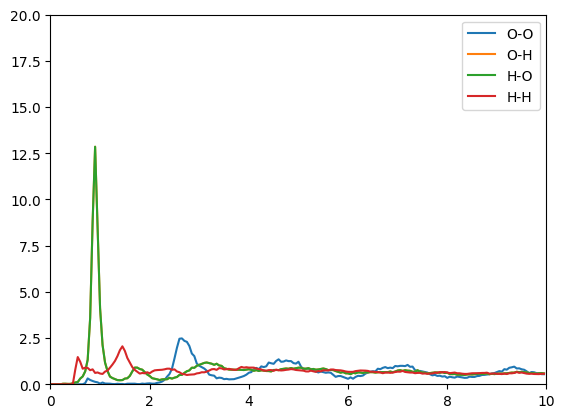

In [18]:
import torch
import numpy as np
import matplotlib.pyplot as plt
a = torch.load("/home/supercgor/gitfile/structural_ml/afm_go/log/22-11-17-20-RDF.npy").cpu()
O_O = a[0,0].numpy()
O_H = a[0,1].numpy()
H_O = a[1,0].numpy()
H_H = a[1,1].numpy()
x = np.arange(0,10,0.05)
plt.plot(x,O_O, label = "O-O")
plt.plot(x,O_H, label = "O-H")
plt.plot(x,H_O, label = "H-O")
plt.plot(x,H_H, label = "H-H")
plt.legend()
plt.ylim(0,20)
plt.xlim(0,10)
plt.show()